In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import STOPWORDS

In [2]:
df = pd.read_csv('../kindle_reviews.csv', keep_default_na=False)
df = df.rename(columns={'Unnamed: 0': 'Id'})

print('Data Set Shape = {}'.format(df.shape))
print('Data Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))
print(df.columns)

Data Set Shape = (982619, 10)
Data Set Memory Usage = 74.97 MB
Index(['Id', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


# Cardinality

In [3]:
print("Number of unique books: {}".format(df['asin'].nunique()))
print("Number of unique reviewers: {}".format(df['reviewerID'].nunique()))

Number of unique books: 61934
Number of unique reviewers: 68223


In [4]:
reviewsperbook = df.groupby('asin')['overall'].value_counts(dropna=False)

#Build stacked bar histogram if possible

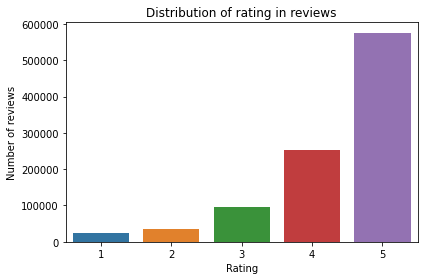

In [5]:
distribution = df['overall'].value_counts(dropna=False)

fig = sns.barplot(distribution.index, distribution)
fig.set(xlabel='Rating', ylabel='Number of reviews', title="Distribution of rating in reviews")
fig.get_figure().tight_layout()
fig.get_figure().savefig("Distributuon_of_rating.png")

# Meta Features

In [6]:
#remove text with images
df = df[~df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)]

print(df.count())

df['punctuation'] = df['reviewText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

Id                982590
asin              982590
helpful           982590
overall           982590
reviewText        982590
reviewTime        982590
reviewerID        982590
reviewerName      982590
summary           982590
unixReviewTime    982590
dtype: int64


Get the number of punctuations in text by rating

Id                962627
asin              962627
helpful           962627
overall           962627
reviewText        962627
reviewTime        962627
reviewerID        962627
reviewerName      962627
summary           962627
unixReviewTime    962627
punctuation       962627
dtype: int64


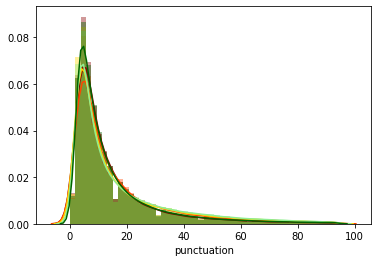

In [7]:
#remove outliers
df_outliers = df[np.abs(df['punctuation']-df['punctuation'].mean())<=(3*df['punctuation'].std())]

rating1 = df_outliers['overall']==1
rating2 = df_outliers['overall']==2
rating3 = df_outliers['overall']==3
rating4 = df_outliers['overall']==4
rating5 = df_outliers['overall']==5

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df_outliers['punctuation'].max())
print(df_outliers.count())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

sns.distplot(df_outliers.loc[rating1]['punctuation'], label='Rating 1', color='darkred')
sns.distplot(df_outliers.loc[rating2]['punctuation'], label='Rating 2', color='orangered')
sns.distplot(df_outliers.loc[rating3]['punctuation'], label='Rating 3', color='gold')
sns.distplot(df_outliers.loc[rating4]['punctuation'], label='Rating 4', color='lightgreen')
sns.distplot(df_outliers.loc[rating5]['punctuation'], label='Rating 5', color='darkgreen')

Get average word count

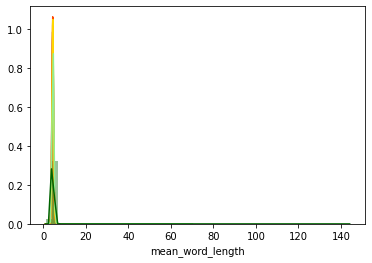

In [8]:
df['mean_word_length'] = df['reviewText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df['punctuation'].max())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

rating1 = df['overall']==1
rating2 = df['overall']==2
rating3 = df['overall']==3
rating4 = df['overall']==4
rating5 = df['overall']==5

sns.distplot(df.loc[rating1]['mean_word_length'], label='Rating 1', color='darkred')
sns.distplot(df.loc[rating2]['mean_word_length'], label='Rating 2', color='orangered')
sns.distplot(df.loc[rating3]['mean_word_length'], label='Rating 3', color='gold')
sns.distplot(df.loc[rating4]['mean_word_length'], label='Rating 4', color='lightgreen')
sns.distplot(df.loc[rating5]['mean_word_length'], label='Rating 5', color='darkgreen')

# Unique Word Count

65.74294030758537 0    20
dtype: int64
76.55646059185467 0    20
dtype: int64
79.88665377578177 0    20
dtype: int64
85.28069919883467 0    20
dtype: int64
70.88405809698476 0    20
dtype: int64


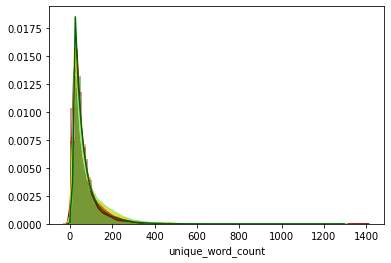

In [9]:
df['unique_word_count'] = df['reviewText'].apply(lambda x: len(set(str(x).split())))

rating1 = df['overall']==1
rating2 = df['overall']==2
rating3 = df['overall']==3
rating4 = df['overall']==4
rating5 = df['overall']==5

print(df.loc[rating1]['unique_word_count'].mean(), df.loc[rating1]['unique_word_count'].mode())
print(df.loc[rating2]['unique_word_count'].mean(), df.loc[rating2]['unique_word_count'].mode())
print(df.loc[rating3]['unique_word_count'].mean(), df.loc[rating3]['unique_word_count'].mode())
print(df.loc[rating4]['unique_word_count'].mean(), df.loc[rating4]['unique_word_count'].mode())
print(df.loc[rating5]['unique_word_count'].mean(), df.loc[rating5]['unique_word_count'].mode())

sns.distplot(df.loc[rating1]['unique_word_count'], label='Rating 1', color='darkred')
sns.distplot(df.loc[rating2]['unique_word_count'], label='Rating 2', color='orangered')
sns.distplot(df.loc[rating3]['unique_word_count'], label='Rating 3', color='gold')
sns.distplot(df.loc[rating4]['unique_word_count'], label='Rating 4', color='lightgreen')
sns.distplot(df.loc[rating5]['unique_word_count'], label='Rating 5', color='darkgreen')

# STOP Word Count

47.4529933095838 0    12
dtype: int64
57.54922355698799 0    14
dtype: int64
60.60668246839654 0    12
dtype: int64
63.7518237829964 0    12
dtype: int64
49.894877834661756 0    11
dtype: int64


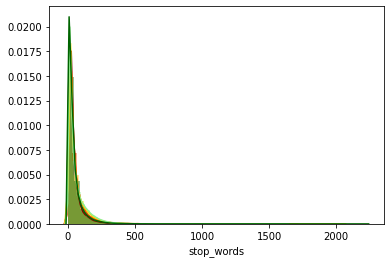

In [10]:
df['stop_words'] = df['reviewText'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

rating1 = df['overall']==1
rating2 = df['overall']==2
rating3 = df['overall']==3
rating4 = df['overall']==4
rating5 = df['overall']==5

print(df.loc[rating1]['stop_words'].mean(), df.loc[rating1]['stop_words'].mode())
print(df.loc[rating2]['stop_words'].mean(), df.loc[rating2]['stop_words'].mode())
print(df.loc[rating3]['stop_words'].mean(), df.loc[rating3]['stop_words'].mode())
print(df.loc[rating4]['stop_words'].mean(), df.loc[rating4]['stop_words'].mode())
print(df.loc[rating5]['stop_words'].mean(), df.loc[rating5]['stop_words'].mode())

sns.distplot(df.loc[rating1]['stop_words'], label='Rating 1', color='darkred')
sns.distplot(df.loc[rating2]['stop_words'], label='Rating 2', color='orangered')
sns.distplot(df.loc[rating3]['stop_words'], label='Rating 3', color='gold')
sns.distplot(df.loc[rating4]['stop_words'], label='Rating 4', color='lightgreen')
sns.distplot(df.loc[rating5]['stop_words'], label='Rating 5', color='darkgreen')

# Helpfulness

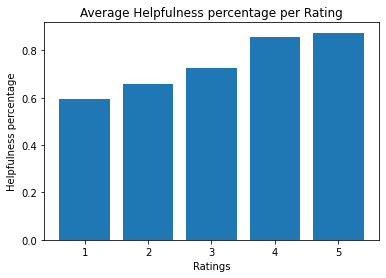

In [102]:
helpfulness = []
labels = ['1', '2', '3', '4', '5']

rating_helpf, rating_total = 0, 0

for review in df[rating1]['helpful'].values:
    n = review.split('[', 1)[1].split(']')[0].split(',')
    rating_helpf += int(n[0])
    rating_total += int(n[1])
    
helpfulness.append(rating_helpf/rating_total)
rating_helpf, rating_total = 0, 0

for review in df[rating2]['helpful'].values:
    n = review.split('[', 1)[1].split(']')[0].split(',')
    rating_helpf += int(n[0])
    rating_total += int(n[1])

helpfulness.append(rating_helpf/rating_total)
rating_helpf, rating_total = 0, 0

for review in df[rating3]['helpful'].values:
    n = review.split('[', 1)[1].split(']')[0].split(',')
    rating_helpf += int(n[0])
    rating_total += int(n[1])

helpfulness.append(rating_helpf/rating_total)
rating_helpf, rating_total = 0, 0

for review in df[rating4]['helpful'].values:
    n = review.split('[', 1)[1].split(']')[0].split(',')
    rating_helpf += int(n[0])
    rating_total += int(n[1])

helpfulness.append(rating_helpf/rating_total)
rating_helpf, rating_total = 0, 0

for review in df[rating5]['helpful'].values:
    n = review.split('[', 1)[1].split(']')[0].split(',')
    rating_helpf += int(n[0])
    rating_total += int(n[1])

helpfulness.append(rating_helpf/rating_total)
x = np.arange(5)

plt.bar(x, helpfulness)
plt.ylabel('Helpfulness percentage')
plt.xlabel('Ratings')
plt.title('Average Helpfulness percentage per Rating')
plt.xticks(x, labels)
plt.savefig('helpfulness.png')

# N-Grams

In [11]:
def generate_ngrams(text, n_gram=1):
    token = text.split()
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [12]:
from collections import defaultdict

rating1_unigrams = defaultdict(int)
rating2_unigrams = defaultdict(int)
rating3_unigrams = defaultdict(int)
rating4_unigrams = defaultdict(int)
rating5_unigrams = defaultdict(int)

Uni-gram

In [13]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review):
        rating1_unigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review):
        rating2_unigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review):
        rating3_unigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review):
        rating4_unigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review):
        rating5_unigrams[word] += 1

Rating 1: 
['the' 'I' 'to' 'a' 'and' 'of' 'was' 'is' 'this' 'it'] [86275 60578 56270 52763 52644 39066 31843 30196 29744 25868]
Rating 2: 
['the' 'I' 'to' 'and' 'a' 'of' 'was' 'is' 'it' 'this'] [169082 103667 101781  97173  95740  73445  61471  49349  46529  44558]
Rating 3: 
['the' 'a' 'and' 'to' 'I' 'of' 'was' 'is' 'in' 'it'] [512684 321787 316153 306089 291011 227236 177272 159727 142919 133577]
Rating 4: 
['the' 'and' 'to' 'a' 'I' 'of' 'is' 'in' 'was' 'that'] [1358000 1037631  924609  916528  714890  644887  526654  430690  381029
  378393]
Rating 5: 
['the' 'and' 'to' 'a' 'I' 'of' 'is' 'in' 'this' 'that'] [2283324 1926413 1672660 1457502 1430741 1123369  961783  758834  720577
  641560]


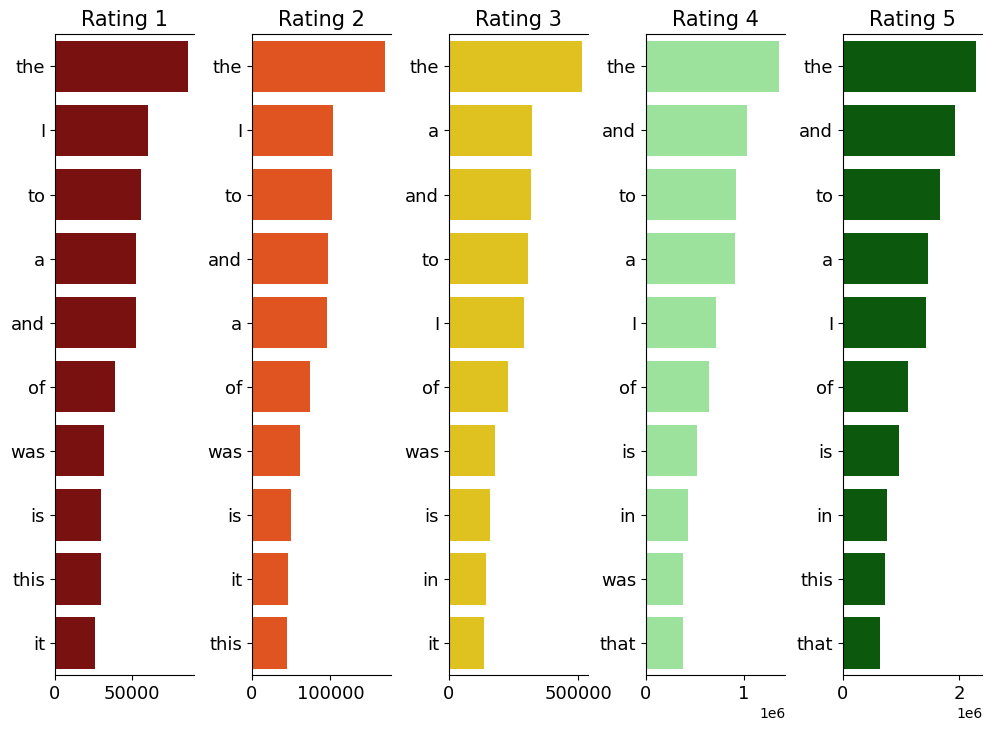

In [14]:
df_rating1_unigrams = pd.DataFrame(sorted(rating1_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_unigrams = pd.DataFrame(sorted(rating2_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_unigrams = pd.DataFrame(sorted(rating3_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_unigrams = pd.DataFrame(sorted(rating4_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_unigrams = pd.DataFrame(sorted(rating5_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(10, 7), dpi=100)
plt.tight_layout()

N = 10 #only select top n unigrams

print("Rating 1: ")
print(df_rating1_unigrams[0].values[:N], df_rating1_unigrams[1].values[:N])
print("Rating 2: ")
print(df_rating2_unigrams[0].values[:N], df_rating2_unigrams[1].values[:N])
print("Rating 3: ")
print(df_rating3_unigrams[0].values[:N], df_rating3_unigrams[1].values[:N])
print("Rating 4: ")
print(df_rating4_unigrams[0].values[:N], df_rating4_unigrams[1].values[:N])
print("Rating 5: ")
print(df_rating5_unigrams[0].values[:N], df_rating5_unigrams[1].values[:N])

sns.barplot(y=df_rating1_unigrams[0].values[:N], x=df_rating1_unigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_unigrams[0].values[:N], x=df_rating2_unigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_unigrams[0].values[:N], x=df_rating3_unigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_unigrams[0].values[:N], x=df_rating4_unigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_unigrams[0].values[:N], x=df_rating5_unigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

Bi-gram

In [15]:
rating1_bigrams = defaultdict(int)
rating2_bigrams = defaultdict(int)
rating3_bigrams = defaultdict(int)
rating4_bigrams = defaultdict(int)
rating5_bigrams = defaultdict(int)

In [16]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating1_bigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating2_bigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating3_bigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating4_bigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating5_bigrams[word] += 1

Rating 1: 
['of the' 'this book' 'in the' 'it was' 'to be' 'to the' 'I was'
 'the book' 'is a' 'and the'] [9037 6362 6017 4988 4827 3733 3717 3465 3435 3284]
Rating 2: 
['of the' 'in the' 'this book' 'to be' 'it was' 'I was' 'the story'
 'to the' 'the book' 'and the'] [18871 12214  9076  8940  8634  7540  7504  7251  7081  6725]
Rating 3: 
['of the' 'in the' 'was a' 'is a' 'it was' 'the story' 'to be' 'this book'
 'to the' 'and the'] [57183 39744 27813 27459 26294 24838 24038 22657 21673 21060]
Rating 4: 
['of the' 'in the' 'is a' 'was a' 'this book' 'to the' 'and the' 'to be'
 'and I' 'the story'] [140658 111096  98673  68006  65986  62416  61752  58943  53356  51371]
Rating 5: 
['of the' 'in the' 'is a' 'this book' 'and the' 'to the' 'and I' 'I was'
 'to be' 'to read'] [225723 178193 176742 169444 106446 106206 102431  98575  92271  86159]


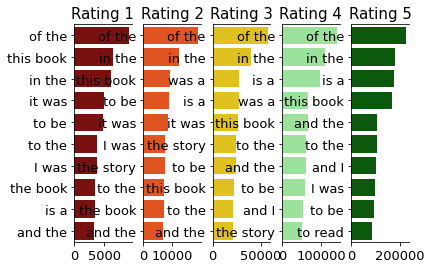

In [17]:
df_rating1_bigrams = pd.DataFrame(sorted(rating1_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_bigrams = pd.DataFrame(sorted(rating2_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_bigrams = pd.DataFrame(sorted(rating3_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_bigrams = pd.DataFrame(sorted(rating4_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_bigrams = pd.DataFrame(sorted(rating5_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5)

N = 10 #only select top n unigrams

print("Rating 1: ")
print(df_rating1_bigrams[0].values[:N], df_rating1_bigrams[1].values[:N])
print("Rating 2: ")
print(df_rating2_bigrams[0].values[:N], df_rating2_bigrams[1].values[:N])
print("Rating 3: ")
print(df_rating3_bigrams[0].values[:N], df_rating3_bigrams[1].values[:N])
print("Rating 4: ")
print(df_rating4_bigrams[0].values[:N], df_rating4_bigrams[1].values[:N])
print("Rating 5: ")
print(df_rating5_bigrams[0].values[:N], df_rating5_bigrams[1].values[:N])

sns.barplot(y=df_rating1_bigrams[0].values[:N], x=df_rating1_bigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_bigrams[0].values[:N], x=df_rating2_bigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_bigrams[0].values[:N], x=df_rating3_bigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_bigrams[0].values[:N], x=df_rating4_bigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_bigrams[0].values[:N], x=df_rating5_bigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

In [18]:
rating1_trigrams = defaultdict(int)
rating2_trigrams = defaultdict(int)
rating3_trigrams = defaultdict(int)
rating4_trigrams = defaultdict(int)
rating5_trigrams = defaultdict(int)

In [19]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating1_trigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating2_trigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating3_trigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating4_trigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating5_trigrams[word] += 1

Rating 1: 
['a lot of' 'this book was' 'I did not' 'of the book' 'This book was'] [874 839 793 787 774]
Rating 2: 
['a lot of' 'of the book' 'to be a' 'could have been' 'I did not'] [2392 1817 1443 1439 1198]
Rating 3: 
['a lot of' 'it was a' 'I would have' 'of the book' 'could have been'] [8248 4909 4815 4514 4142]
Rating 4: 
['a lot of' 'This is a' 'I really enjoyed' 'for an honest' 'This was a'] [18386 12789 10964 10946 10811]
Rating 5: 
['This is a' 'a lot of' "I can't wait" 'in love with' 'for the next'] [30129 26703 24794 22349 21101]


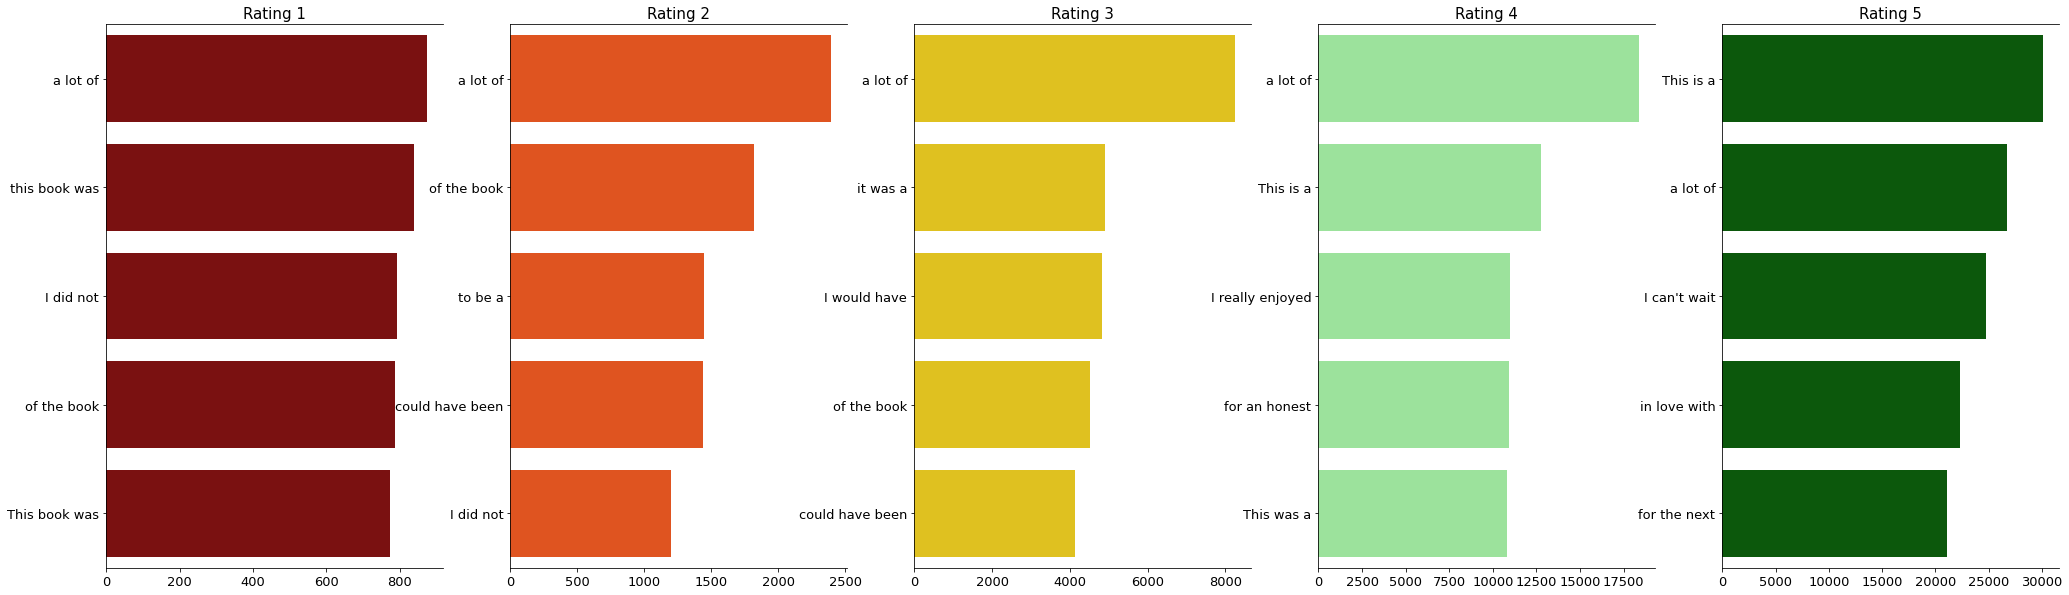

In [20]:
df_rating1_trigrams = pd.DataFrame(sorted(rating1_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_trigrams = pd.DataFrame(sorted(rating2_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_trigrams = pd.DataFrame(sorted(rating3_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_trigrams = pd.DataFrame(sorted(rating4_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_trigrams = pd.DataFrame(sorted(rating5_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(35, 10))

N = 5 #only select top n unigrams

print("Rating 1: ")
print(df_rating1_trigrams[0].values[:N], df_rating1_trigrams[1].values[:N])
print("Rating 2: ")
print(df_rating2_trigrams[0].values[:N], df_rating2_trigrams[1].values[:N])
print("Rating 3: ")
print(df_rating3_trigrams[0].values[:N], df_rating3_trigrams[1].values[:N])
print("Rating 4: ")
print(df_rating4_trigrams[0].values[:N], df_rating4_trigrams[1].values[:N])
print("Rating 5: ")
print(df_rating5_trigrams[0].values[:N], df_rating5_trigrams[1].values[:N])

sns.barplot(y=df_rating1_trigrams[0].values[:N], x=df_rating1_trigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_trigrams[0].values[:N], x=df_rating2_trigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_trigrams[0].values[:N], x=df_rating3_trigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_trigrams[0].values[:N], x=df_rating4_trigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_trigrams[0].values[:N], x=df_rating5_trigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.savefig('trigram.png')

8